In [62]:
import pandas as pd
import numpy as np

In [63]:
data = pd.read_csv("meteofrance_data.csv", sep = ";")

In [64]:
data.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,20004002,AJACCIO,41.918,8.792667,5,2023010100,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20004002,AJACCIO,41.918,8.792667,5,2023010101,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,20004002,AJACCIO,41.918,8.792667,5,2023010102,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20004002,AJACCIO,41.918,8.792667,5,2023010103,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20004002,AJACCIO,41.918,8.792667,5,2023010104,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data.shape

(560346, 204)

In [66]:
colonnes_a_garder = ['AAAAMMJJHH', 'TD', 'U', ' T', 'TX', 'TN', 'RR1', 'PSTAT']
df = data[colonnes_a_garder]

In [67]:
df.head()

,AAAAMMJJHH,TD,U,T,TX,TN,RR1,PSTAT
0,2023010100,10.0,94.0,11.0,11.0,9.7,0.0,1029.4
1,2023010101,9.2,92.0,10.4,10.9,9.9,0.0,1029.4
2,2023010102,9.2,95.0,9.9,10.3,9.0,0.0,1029.3
3,2023010103,8.4,92.0,9.6,10.1,9.5,0.0,1028.9
4,2023010104,8.0,89.0,9.7,10.5,9.7,0.0,1028.6


In [68]:
df['AAAAMMJJHH'] = pd.to_datetime(df['AAAAMMJJHH'], format='%Y%m%d%H')

/tmp/ipykernel_48192/1953429037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AAAAMMJJHH'] = pd.to_datetime(df['AAAAMMJJHH'], format='%Y%m%d%H')


In [69]:
df.head()

,AAAAMMJJHH,TD,U,T,TX,TN,RR1,PSTAT
0,2023-01-01 00:00:00,10.0,94.0,11.0,11.0,9.7,0.0,1029.4
1,2023-01-01 01:00:00,9.2,92.0,10.4,10.9,9.9,0.0,1029.4
2,2023-01-01 02:00:00,9.2,95.0,9.9,10.3,9.0,0.0,1029.3
3,2023-01-01 03:00:00,8.4,92.0,9.6,10.1,9.5,0.0,1028.9
4,2023-01-01 04:00:00,8.0,89.0,9.7,10.5,9.7,0.0,1028.6


In [70]:
df.rename(columns={
    'AAAAMMJJHH' : 'date' ,
    'TD': 'dewpoint',
    'U': 'humidity',
    ' T': 'temperature',
    'TX': 'temperature max',
    'TN': 'temperature min',
    'RR1': 'rain',
    'PSTAT': 'pressure'
}, inplace=True)

/tmp/ipykernel_48192/3881505444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [71]:
from skimpy import *
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 560346 │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA       ┃ NA %    ┃ mean   ┃ sd    ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ dewpoint            │   274712 │   49.03 │    7.7 │   7.3 │  -46 │   3.6 │   8.1 │    12 │    26 │    ▂▇▂  │  │
│ │ humidity            │   274695 │   49.02 │     69 │    20 │    2 │    56 │    71 │    85 │   100 │  ▁▃▇▇▇  │  │
│ │ temperature         │     1104 │     0.2 │     14 │   7.8 │  -13 │   8.5 │    13 │    19 │    42 │   ▂▇▅▂  │  │
│ │ temperature max     │    22838 │    4.08 │     15 │   7.6 │  -10 │   9.4 │    14 │    20 │    43 │   ▃▇▅▂  │  │
│ │ temperature min     │    22709 │    4.05 │     14 │   7.4 │  -11 │   8.4 │    13 │    19 │    42 │   ▃▇▅▂  │  │
│ │ rain                │    24499 │    4.37 │    0.1 │  0.73 │    0 │     0 │     0 │     0 │    77 │    ▇    │  │
│ │ pressure            │   465595 │   83.09 │   1000 │    10 │  970 │  1000 │  1000 │  1000 │  1000 │  ▁▅▇▅▁  │  │
│ └─────────────────────┴──────────┴─────────┴────────┴───────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %     ┃ first            ┃ last                           ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ date               │     0 │        0 │    2023-01-01    │      2024-03-20 03:00:00       │ None           │  │
│ └────────────────────┴───────┴──────────┴──────────────────┴────────────────────────────────┴────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_num = df.select_dtypes(include=['int64', 'float64'])

In [73]:
colonnes_num_corr = colonnes_num.corr()

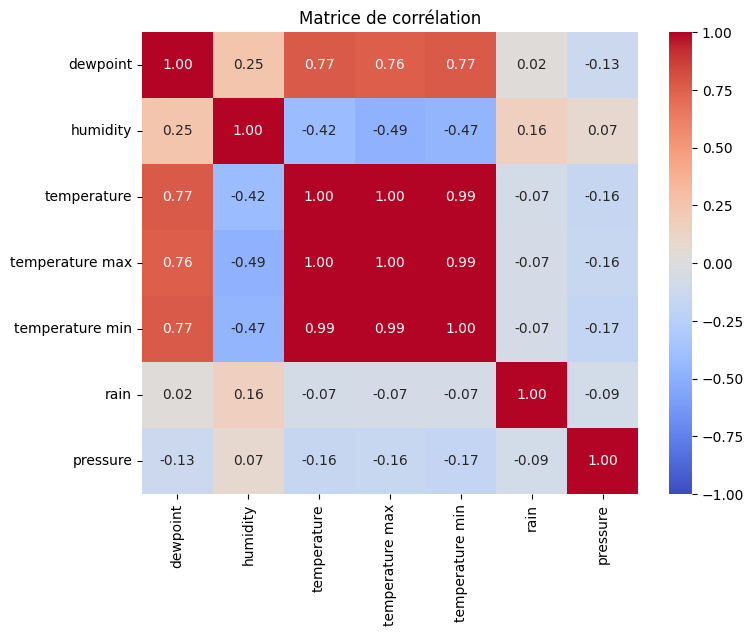

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(colonnes_num_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()

Trop de valeurs manquantes pour la colonnes pressure (83% de données manquantes), faible corrélation avec les autres colonnes, on ne travaillera pas sur avec cette colonne.

In [75]:
df.drop('pressure', axis=1, inplace=True)

/tmp/ipykernel_48192/3401430350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('pressure', axis=1, inplace=True)


In [76]:
df.head()

,date,dewpoint,humidity,temperature,temperature max,temperature min,rain
0,2023-01-01 00:00:00,10.0,94.0,11.0,11.0,9.7,0.0
1,2023-01-01 01:00:00,9.2,92.0,10.4,10.9,9.9,0.0
2,2023-01-01 02:00:00,9.2,95.0,9.9,10.3,9.0,0.0
3,2023-01-01 03:00:00,8.4,92.0,9.6,10.1,9.5,0.0
4,2023-01-01 04:00:00,8.0,89.0,9.7,10.5,9.7,0.0


on va utiliser l'inputation par interpolation pour remplir les valeurs NaN dans nos données.

In [77]:
df.interpolate(method='linear', inplace=True)

/tmp/ipykernel_48192/2868764835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)


In [78]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 560346 │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %   ┃ mean     ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ dewpoint              │    0 │      0 │      6.7 │      6 │   -46 │   3.9 │   7.1 │  9.7 │    26 │    ▂▇▁  │  │
│ │ humidity              │    0 │      0 │       76 │     18 │     2 │    65 │    79 │   93 │   100 │   ▁▃▅▇  │  │
│ │ temperature           │    0 │      0 │       14 │    7.8 │   -13 │   8.5 │    13 │   19 │    42 │   ▂▇▆▂  │  │
│ │ temperature max       │    0 │      0 │       15 │    7.5 │   -10 │   9.4 │    14 │   20 │    43 │   ▂▇▅▂  │  │
│ │ temperature min       │    0 │      0 │       14 │    7.4 │   -11 │   8.3 │    13 │   19 │    42 │   ▃▇▅▁  │  │
│ │ rain                  │    0 │      0 │    0.098 │   0.72 │     0 │     0 │     0 │    0 │    77 │    ▇    │  │
│ └───────────────────────┴──────┴────────┴──────────┴────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %     ┃ first            ┃ last                           ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ date               │     0 │        0 │    2023-01-01    │      2024-03-20 03:00:00       │ None           │  │
│ └────────────────────┴───────┴──────────┴──────────────────┴────────────────────────────────┴────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

On va commencer par une regression linéaire : 

Prédiction de la colonne: dewpoint


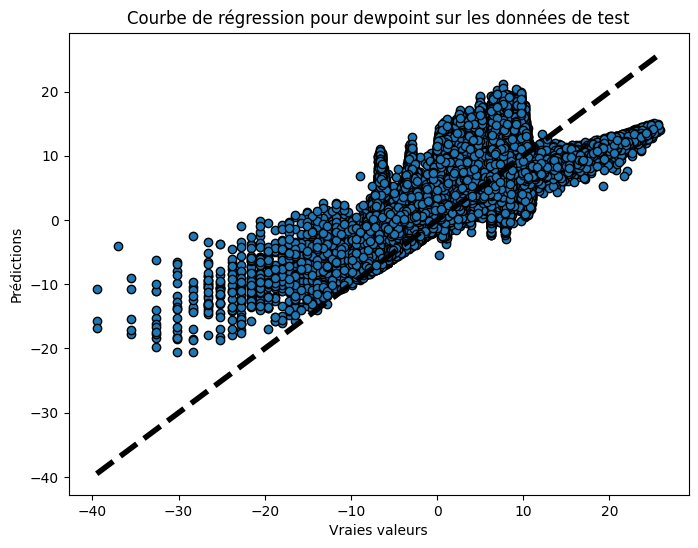

Scores de validation croisée pour dewpoint (MSE): [19.62158484 19.76107905 19.65619981 19.7353077  19.83277335]
Score moyen de validation croisée pour dewpoint (MSE): 19.721388948157
Scores de validation croisée pour dewpoint (RMSE): [4.42962581 4.44534352 4.4335313  4.44244389 4.4534002 ]
Score moyen de validation croisée pour dewpoint (RMSE): 4.440868945535033

Scores de validation croisée pour dewpoint (MAE): [3.46543657 3.48154664 3.46704286 3.47446925 3.48661295]
Score moyen de validation croisée pour dewpoint (MAE): 3.4750216544757526

Scores de validation croisée pour dewpoint (R2): [0.45553084 0.45786544 0.45745567 0.45409159 0.45490325]
Score moyen de validation croisée pour dewpoint (R2): 0.4559693565511115

 ------------------------------------------------------ 
Prédiction de la colonne: humidity


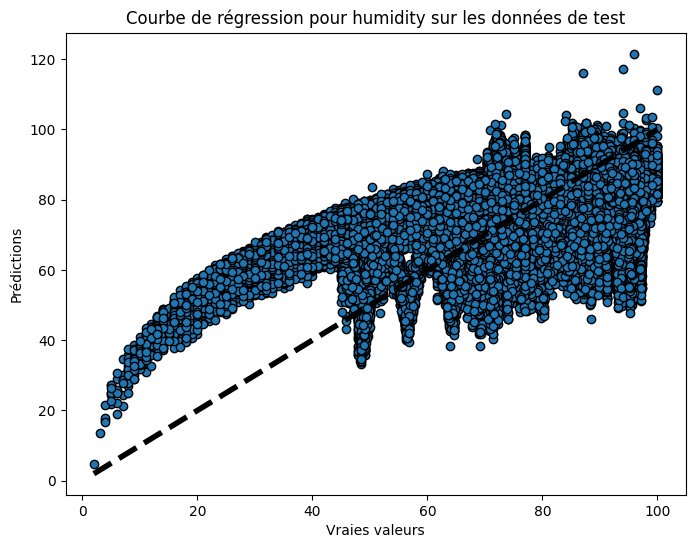

Scores de validation croisée pour humidity (MSE): [247.03994516 250.71404984 246.26845471 247.06999383 247.27182068]
Score moyen de validation croisée pour humidity (MSE): 247.6728528433511
Scores de validation croisée pour humidity (RMSE): [15.71750442 15.83395244 15.69294283 15.71846029 15.72487904]
Score moyen de validation croisée pour humidity (RMSE): 15.737547802572488

Scores de validation croisée pour humidity (MAE): [12.94286316 13.05957768 12.90998097 12.95648226 12.94270928]
Score moyen de validation croisée pour humidity (MAE): 12.962322670882676

Scores de validation croisée pour humidity (R2): [0.26618529 0.27322478 0.27386722 0.27352818 0.26958212]
Score moyen de validation croisée pour humidity (R2): 0.2712775159598218

 ------------------------------------------------------ 
Prédiction de la colonne: temperature


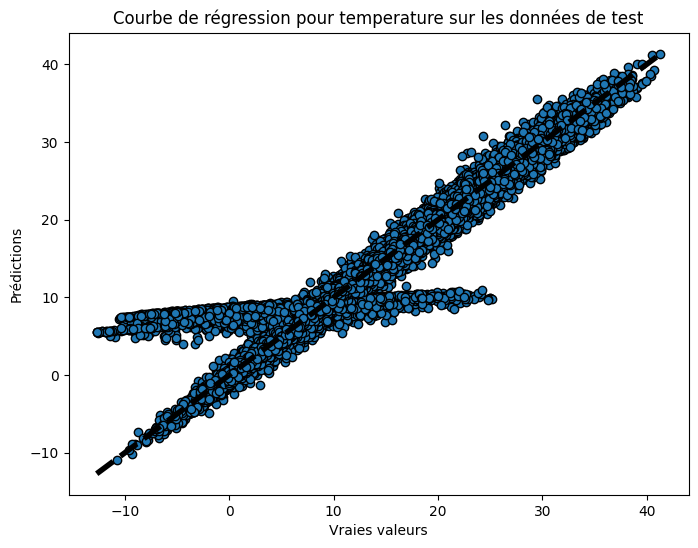

Scores de validation croisée pour temperature (MSE): [2.80574976 2.93060302 2.86824193 2.74227703 2.72282459]
Score moyen de validation croisée pour temperature (MSE): 2.8139392668553382
Scores de validation croisée pour temperature (RMSE): [1.67503724 1.71190041 1.69358848 1.65598219 1.65009836]
Score moyen de validation croisée pour temperature (RMSE): 1.677321336860207

Scores de validation croisée pour temperature (MAE): [0.8564156  0.86821613 0.86159368 0.85608388 0.85687809]
Score moyen de validation croisée pour temperature (MAE): 0.8598374761343728

Scores de validation croisée pour temperature (R2): [0.95315061 0.95162417 0.95202285 0.95419486 0.95459756]
Score moyen de validation croisée pour temperature (R2): 0.9531180102624424

 ------------------------------------------------------ 
Prédiction de la colonne: temperature max


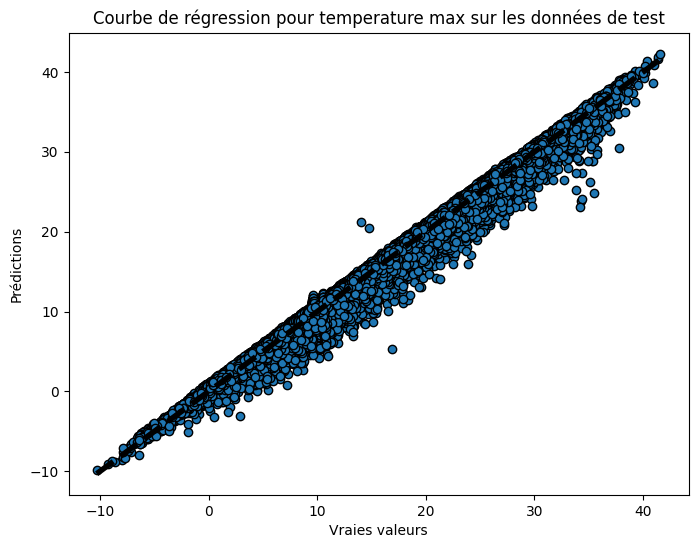

Scores de validation croisée pour temperature max (MSE): [0.75522451 0.76775558 0.76026178 0.7423059  0.76169046]
Score moyen de validation croisée pour temperature max (MSE): 0.7574476473811578
Scores de validation croisée pour temperature max (RMSE): [0.86903654 0.87621663 0.87192992 0.86157176 0.8727488 ]
Score moyen de validation croisée pour temperature max (RMSE): 0.8703007294865784

Scores de validation croisée pour temperature max (MAE): [0.62407837 0.62632386 0.62453497 0.6211377  0.62387187]
Score moyen de validation croisée pour temperature max (MAE): 0.6239893565900602

Scores de validation croisée pour temperature max (R2): [0.98663399 0.98651971 0.98648271 0.9868581  0.98657738]
Score moyen de validation croisée pour temperature max (R2): 0.9866143776414346

 ------------------------------------------------------ 
Prédiction de la colonne: temperature min


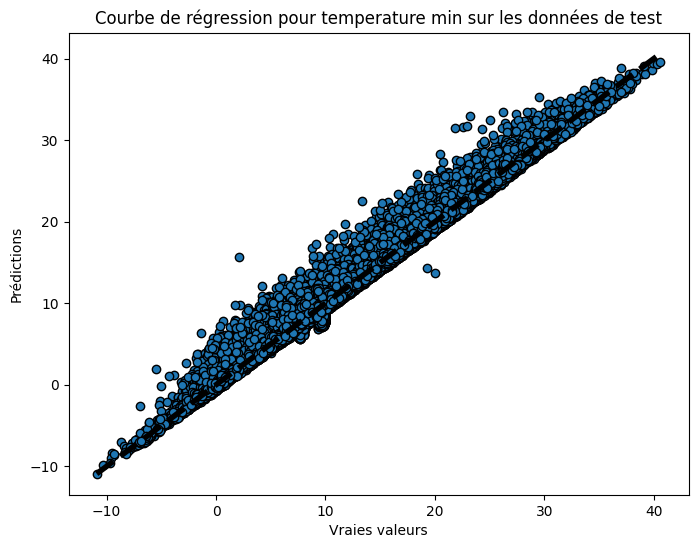

Scores de validation croisée pour temperature min (MSE): [0.75912723 0.77019831 0.76888037 0.75410819 0.77048072]
Score moyen de validation croisée pour temperature min (MSE): 0.7645589659496876
Scores de validation croisée pour temperature min (RMSE): [0.87127908 0.87760943 0.87685824 0.86839403 0.87777031]
Score moyen de validation croisée pour temperature min (RMSE): 0.8743822181486687

Scores de validation croisée pour temperature min (MAE): [0.6118928  0.61638155 0.61348972 0.61153435 0.61403577]
Score moyen de validation croisée pour temperature min (MAE): 0.6134668375133011

Scores de validation croisée pour temperature min (R2): [0.9859709  0.98589335 0.98573518 0.9860863  0.98583788]
Score moyen de validation croisée pour temperature min (R2): 0.9859047204289902

 ------------------------------------------------------ 
Prédiction de la colonne: rain


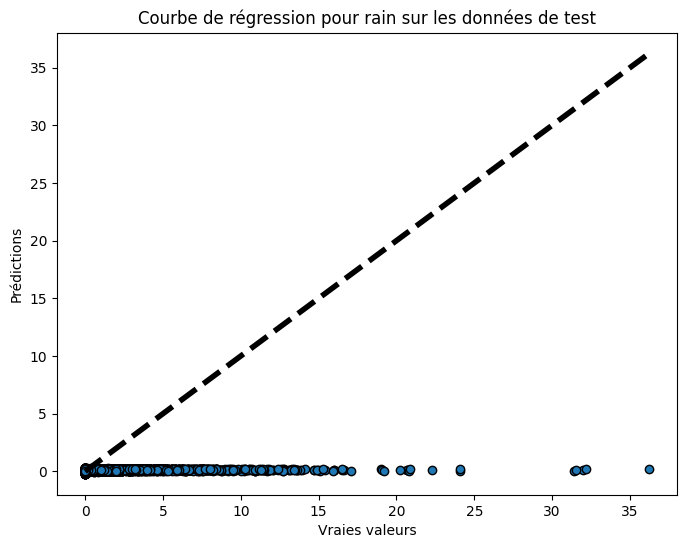

Scores de validation croisée pour rain (MSE): [0.46261632 0.5192922  0.55125205 0.58899526 0.48333032]
Score moyen de validation croisée pour rain (MSE): 0.5210972300986534
Scores de validation croisée pour rain (RMSE): [0.68015904 0.72061932 0.7424635  0.76746027 0.69521962]
Score moyen de validation croisée pour rain (RMSE): 0.7211843488868425

Scores de validation croisée pour rain (MAE): [0.18224653 0.1820932  0.18270581 0.18347821 0.18144743]
Score moyen de validation croisée pour rain (MAE): 0.18239423460907614

Scores de validation croisée pour rain (R2): [0.00925017 0.00832859 0.00770842 0.00761718 0.00866542]
Score moyen de validation croisée pour rain (R2): 0.008313957847870878

 ------------------------------------------------------ 


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for target_column in df.drop(columns=['date']).columns:
    print(f"Prédiction de la colonne: {target_column}")

    features = df.drop(columns=['date', target_column])
    target = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])

    pipe.fit(X_train, y_train)
    

    y_pred = pipe.predict(X_test)

    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Vraies valeurs')
    plt.ylabel('Prédictions')
    plt.title(f'Courbe de régression pour {target_column} sur les données de test')
    plt.show()


    mse_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores  
    rmse_scores = np.sqrt(mse_scores) 
    print(f'Scores de validation croisée pour {target_column} (MSE): {mse_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (MSE): {mse_scores.mean()}')
    
    print(f'Scores de validation croisée pour {target_column} (RMSE): {rmse_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (RMSE): {rmse_scores.mean()}\n')

    
    mae_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores 
    print(f'Scores de validation croisée pour {target_column} (MAE): {mae_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (MAE): {mae_scores.mean()}\n')


    r2_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
    print(f'Scores de validation croisée pour {target_column} (R2): {r2_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (R2): {r2_scores.mean()}\n')
    print(' ------------------------------------------------------ ')


On va refaire la même chose en enlevant les outliers avec la méthode des interquartiles pour tenter d'améliorer les résultats.

In [80]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for target_column in df.drop(columns=['date']).columns:
    df_cleaned = remove_outliers(df, target_column)

print(f"Après nettoyage le dataset a {df_cleaned.shape[0]} lignes (avant {df.shape[0]} lignes)")



Après nettoyage le dataset a 520060 lignes (avant 560346 lignes)


In [81]:
df_cleaned.shape

(520060, 7)

Prédiction de la colonne: dewpoint


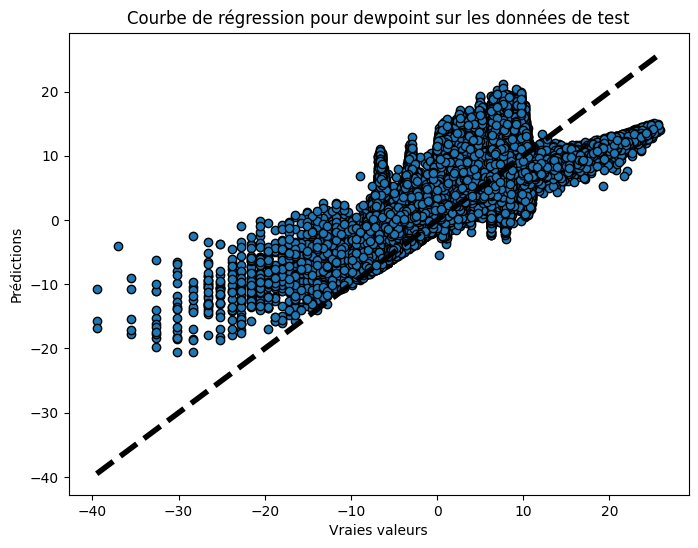

Scores de validation croisée pour dewpoint (MSE): [19.62158484 19.76107905 19.65619981 19.7353077  19.83277335]
Score moyen de validation croisée pour dewpoint (MSE): 19.721388948157
Scores de validation croisée pour dewpoint (RMSE): [4.42962581 4.44534352 4.4335313  4.44244389 4.4534002 ]
Score moyen de validation croisée pour dewpoint (RMSE): 4.440868945535033

Scores de validation croisée pour dewpoint (MAE): [3.46543657 3.48154664 3.46704286 3.47446925 3.48661295]
Score moyen de validation croisée pour dewpoint (MAE): 3.4750216544757526

Scores de validation croisée pour dewpoint (R2): [0.45553084 0.45786544 0.45745567 0.45409159 0.45490325]
Score moyen de validation croisée pour dewpoint (R2): 0.4559693565511115

 ------------------------------------------------------ 
Prédiction de la colonne: humidity


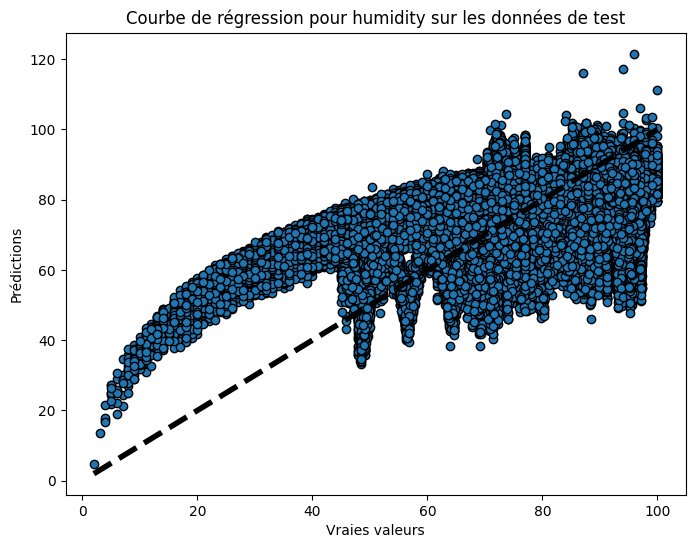

Scores de validation croisée pour humidity (MSE): [247.03994516 250.71404984 246.26845471 247.06999383 247.27182068]
Score moyen de validation croisée pour humidity (MSE): 247.6728528433511
Scores de validation croisée pour humidity (RMSE): [15.71750442 15.83395244 15.69294283 15.71846029 15.72487904]
Score moyen de validation croisée pour humidity (RMSE): 15.737547802572488

Scores de validation croisée pour humidity (MAE): [12.94286316 13.05957768 12.90998097 12.95648226 12.94270928]
Score moyen de validation croisée pour humidity (MAE): 12.962322670882676

Scores de validation croisée pour humidity (R2): [0.26618529 0.27322478 0.27386722 0.27352818 0.26958212]
Score moyen de validation croisée pour humidity (R2): 0.2712775159598218

 ------------------------------------------------------ 
Prédiction de la colonne: temperature


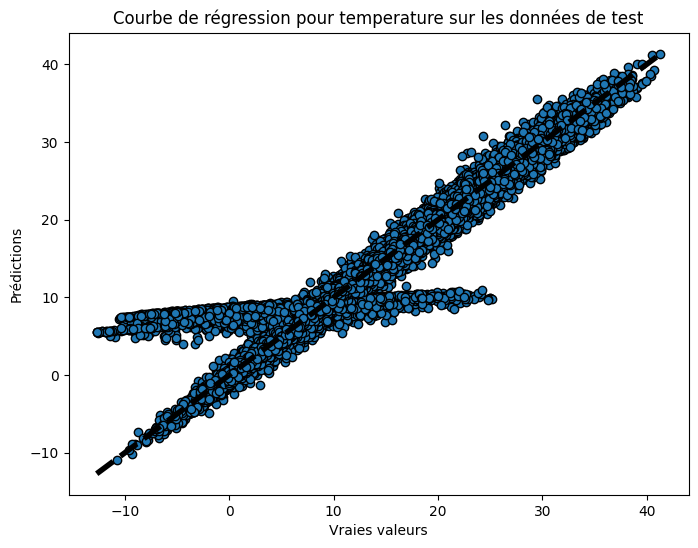

Scores de validation croisée pour temperature (MSE): [2.80574976 2.93060302 2.86824193 2.74227703 2.72282459]
Score moyen de validation croisée pour temperature (MSE): 2.8139392668553382
Scores de validation croisée pour temperature (RMSE): [1.67503724 1.71190041 1.69358848 1.65598219 1.65009836]
Score moyen de validation croisée pour temperature (RMSE): 1.677321336860207

Scores de validation croisée pour temperature (MAE): [0.8564156  0.86821613 0.86159368 0.85608388 0.85687809]
Score moyen de validation croisée pour temperature (MAE): 0.8598374761343728

Scores de validation croisée pour temperature (R2): [0.95315061 0.95162417 0.95202285 0.95419486 0.95459756]
Score moyen de validation croisée pour temperature (R2): 0.9531180102624424

 ------------------------------------------------------ 
Prédiction de la colonne: temperature max


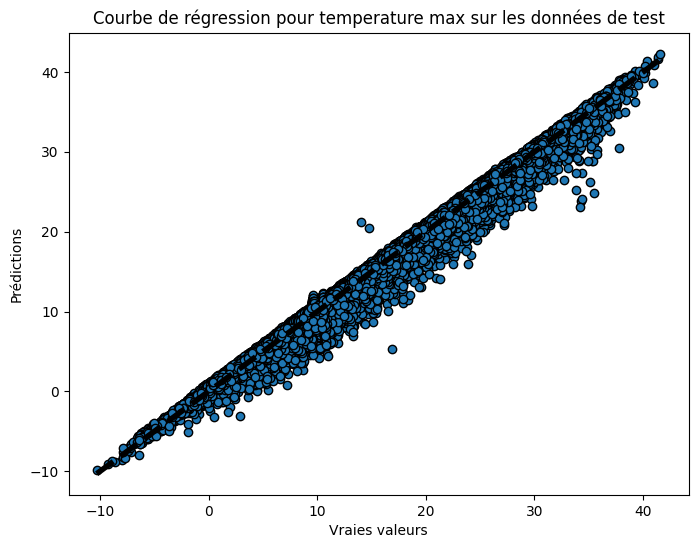

Scores de validation croisée pour temperature max (MSE): [0.75522451 0.76775558 0.76026178 0.7423059  0.76169046]
Score moyen de validation croisée pour temperature max (MSE): 0.7574476473811578
Scores de validation croisée pour temperature max (RMSE): [0.86903654 0.87621663 0.87192992 0.86157176 0.8727488 ]
Score moyen de validation croisée pour temperature max (RMSE): 0.8703007294865784

Scores de validation croisée pour temperature max (MAE): [0.62407837 0.62632386 0.62453497 0.6211377  0.62387187]
Score moyen de validation croisée pour temperature max (MAE): 0.6239893565900602

Scores de validation croisée pour temperature max (R2): [0.98663399 0.98651971 0.98648271 0.9868581  0.98657738]
Score moyen de validation croisée pour temperature max (R2): 0.9866143776414346

 ------------------------------------------------------ 
Prédiction de la colonne: temperature min


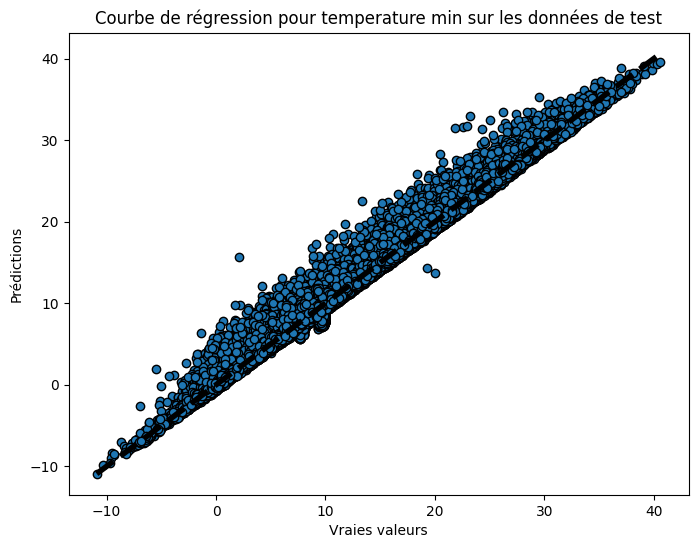

Scores de validation croisée pour temperature min (MSE): [0.75912723 0.77019831 0.76888037 0.75410819 0.77048072]
Score moyen de validation croisée pour temperature min (MSE): 0.7645589659496876
Scores de validation croisée pour temperature min (RMSE): [0.87127908 0.87760943 0.87685824 0.86839403 0.87777031]
Score moyen de validation croisée pour temperature min (RMSE): 0.8743822181486687

Scores de validation croisée pour temperature min (MAE): [0.6118928  0.61638155 0.61348972 0.61153435 0.61403577]
Score moyen de validation croisée pour temperature min (MAE): 0.6134668375133011

Scores de validation croisée pour temperature min (R2): [0.9859709  0.98589335 0.98573518 0.9860863  0.98583788]
Score moyen de validation croisée pour temperature min (R2): 0.9859047204289902

 ------------------------------------------------------ 
Prédiction de la colonne: rain


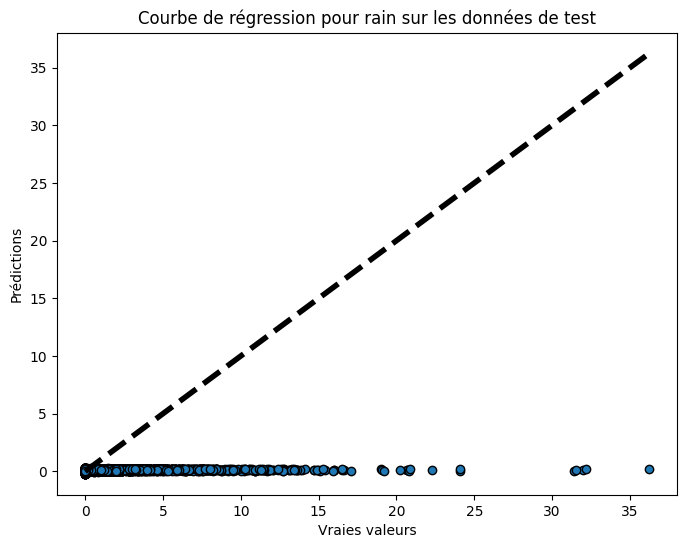

Scores de validation croisée pour rain (MSE): [0.46261632 0.5192922  0.55125205 0.58899526 0.48333032]
Score moyen de validation croisée pour rain (MSE): 0.5210972300986534
Scores de validation croisée pour rain (RMSE): [0.68015904 0.72061932 0.7424635  0.76746027 0.69521962]
Score moyen de validation croisée pour rain (RMSE): 0.7211843488868425

Scores de validation croisée pour rain (MAE): [0.18224653 0.1820932  0.18270581 0.18347821 0.18144743]
Score moyen de validation croisée pour rain (MAE): 0.18239423460907614

Scores de validation croisée pour rain (R2): [0.00925017 0.00832859 0.00770842 0.00761718 0.00866542]
Score moyen de validation croisée pour rain (R2): 0.008313957847870878

 ------------------------------------------------------ 


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


df_cleaned = df.copy()

for target_column in df_cleaned.drop(columns=['date']).columns:
    print(f"Prédiction de la colonne: {target_column}")

    features = df_cleaned.drop(columns=['date', target_column])
    target = df_cleaned[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])

    pipe.fit(X_train, y_train)
    
    
    y_pred = pipe.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Vraies valeurs')
    plt.ylabel('Prédictions')
    plt.title(f'Courbe de régression pour {target_column} sur les données de test')
    plt.show()

    
    mse_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores  
    rmse_scores = np.sqrt(mse_scores)  
    print(f'Scores de validation croisée pour {target_column} (MSE): {mse_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (MSE): {mse_scores.mean()}')
    print(f'Scores de validation croisée pour {target_column} (RMSE): {rmse_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (RMSE): {rmse_scores.mean()}\n')

    
    mae_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores  
    print(f'Scores de validation croisée pour {target_column} (MAE): {mae_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (MAE): {mae_scores.mean()}\n')

    
    r2_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
    print(f'Scores de validation croisée pour {target_column} (R2): {r2_scores}')
    print(f'Score moyen de validation croisée pour {target_column} (R2): {r2_scores.mean()}\n')
    print(' ------------------------------------------------------ ')


Les résultats ne semblent changer après avoir retiré les outliers. 

Pour les colonnes temperature, temperature min et temperature max, la regression linéaire semble bien fonctionner.

Pour la colonne humidity et dewpoint, il semblerait qu'une regression polynomiale serait plus appropriée.

La colonne rain est très difficile à prédire car les valeurs sont très proches de 0 dans tout le dataset.


Régression polynomiale pour la colonne: dewpoint

Degré 2:


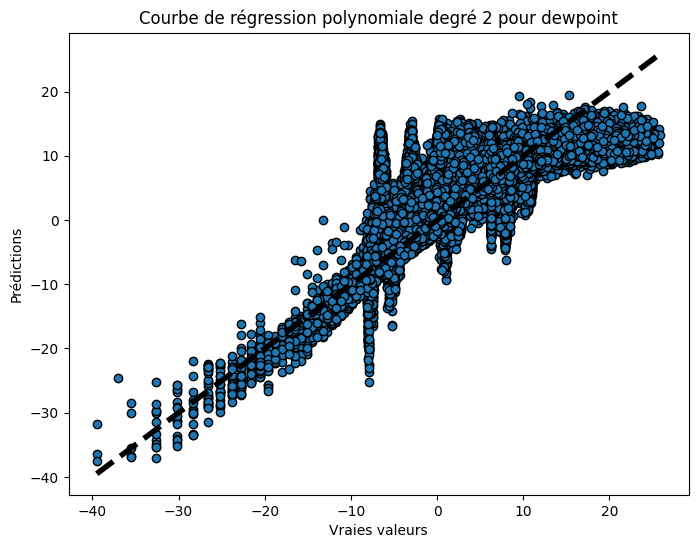

Scores de validation croisée pour dewpoint (MSE): [13.99957319 14.06414186 14.13421424 14.16236919 14.13968749]
Score moyen de validation croisée pour dewpoint (MSE): 14.09999719411706
Scores de validation croisée pour dewpoint (RMSE): [3.74160035 3.75021891 3.75954974 3.76329233 3.76027758]
Score moyen de validation croisée pour dewpoint (RMSE): 3.754987782832744

Scores de validation croisée pour dewpoint (MAE): [2.66648357 2.66946732 2.67359181 2.67412925 2.67886539]
Score moyen de validation croisée pour dewpoint (MAE): 2.6725074677250067

Scores de validation croisée pour R2: [0.61153312 0.61415784 0.6098718  0.60824748 0.6113757 ]
Score moyen de validation croisée pour R2: 0.6110371884644957
 ------------------------------------------------------ 

Degré 3:


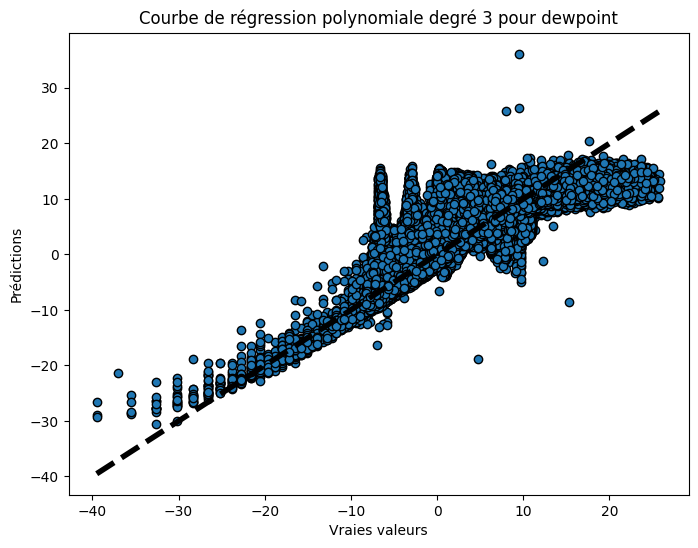

Scores de validation croisée pour dewpoint (MSE): [13.33594809 13.43421637 13.5278983  13.53095012 13.46065063]
Score moyen de validation croisée pour dewpoint (MSE): 13.457932700951961
Scores de validation croisée pour dewpoint (RMSE): [3.65184174 3.66527166 3.67802913 3.67844398 3.66887594]
Score moyen de validation croisée pour dewpoint (RMSE): 3.668492490295919

Scores de validation croisée pour dewpoint (MAE): [2.63028602 2.63916548 2.63937146 2.63650059 2.63823797]
Score moyen de validation croisée pour dewpoint (MAE): 2.636712303914689

Scores de validation croisée pour R2: [0.62994771 0.63143951 0.62660715 0.62571349 0.63003878]
Score moyen de validation croisée pour R2: 0.6287493268401867
 ------------------------------------------------------ 

Degré 4:


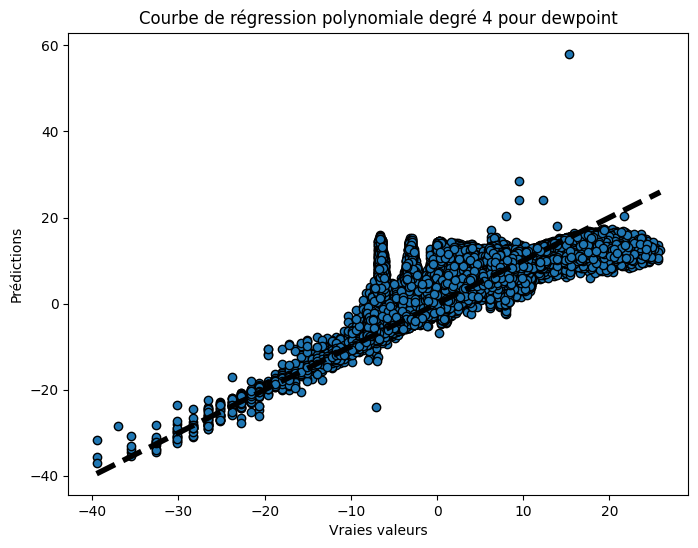

Scores de validation croisée pour dewpoint (MSE): [12.7961535  12.92132592 13.02340664 13.03865055 13.05710399]
Score moyen de validation croisée pour dewpoint (MSE): 12.967328119367869
Scores de validation croisée pour dewpoint (RMSE): [3.57717116 3.59462459 3.60879573 3.61090716 3.6134615 ]
Score moyen de validation croisée pour dewpoint (RMSE): 3.6009920278530934

Scores de validation croisée pour dewpoint (MAE): [2.5603323  2.56356057 2.56902298 2.56765995 2.5656811 ]
Score moyen de validation croisée pour dewpoint (MAE): 2.565251380361301

Scores de validation croisée pour R2: [0.64492619 0.64551038 0.64053197 0.63933124 0.64113012]
Score moyen de validation croisée pour R2: 0.6422859790612755
 ------------------------------------------------------ 

Degré 5:


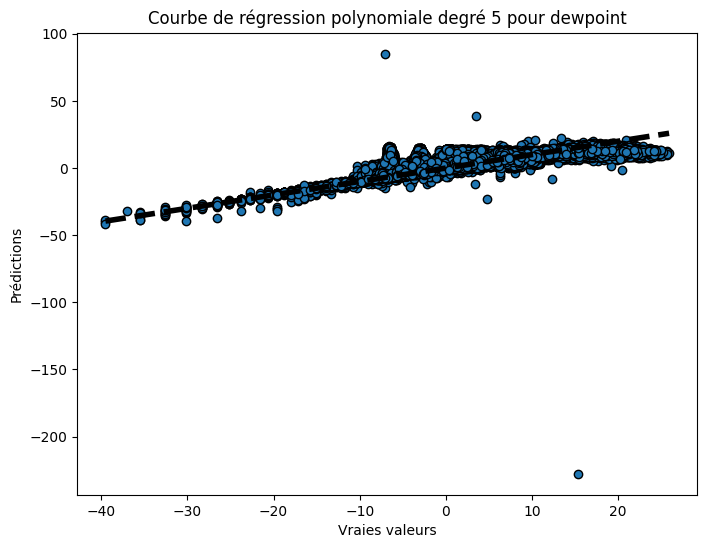

Scores de validation croisée pour dewpoint (MSE): [12.42270699 18.32469867 12.95235377 56.69650089 13.90568564]
Score moyen de validation croisée pour dewpoint (MSE): 22.860389191396187
Scores de validation croisée pour dewpoint (RMSE): [3.52458607 4.28073576 3.59893787 7.52970789 3.7290328 ]
Score moyen de validation croisée pour dewpoint (RMSE): 4.532600078794993

Scores de validation croisée pour dewpoint (MAE): [2.48979928 2.49888296 2.50167239 2.51963773 2.4987032 ]
Score moyen de validation croisée pour dewpoint (MAE): 2.5017391101901345

Scores de validation croisée pour R2: [ 0.65528876  0.49727176  0.64249315 -0.56831082  0.61780715]
Score moyen de validation croisée pour R2: 0.36890999991734275
 ------------------------------------------------------ 
Régression polynomiale pour la colonne: humidity

Degré 2:


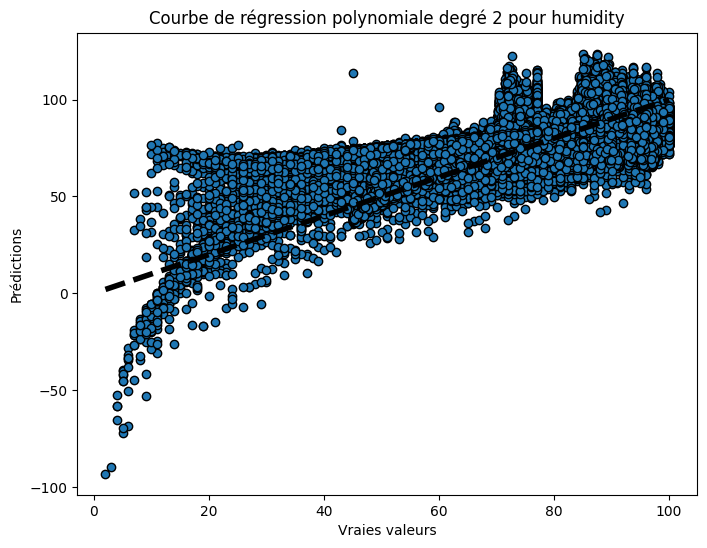

Scores de validation croisée pour humidity (MSE): [191.33921847 194.85074824 190.96576837 192.43971578 190.38258813]
Score moyen de validation croisée pour humidity (MSE): 191.99560779554088
Scores de validation croisée pour humidity (RMSE): [13.83254201 13.95889495 13.81903645 13.87226426 13.7979197 ]
Score moyen de validation croisée pour humidity (RMSE): 13.856131475016833

Scores de validation croisée pour humidity (MAE): [10.86160132 10.95484242 10.83938616 10.87961128 10.82412325]
Score moyen de validation croisée pour humidity (MAE): 10.871912886943075

Scores de validation croisée pour R2: [0.43164037 0.43516251 0.43692949 0.43416022 0.4376276 ]
Score moyen de validation croisée pour R2: 0.4351040358357084
 ------------------------------------------------------ 

Degré 3:


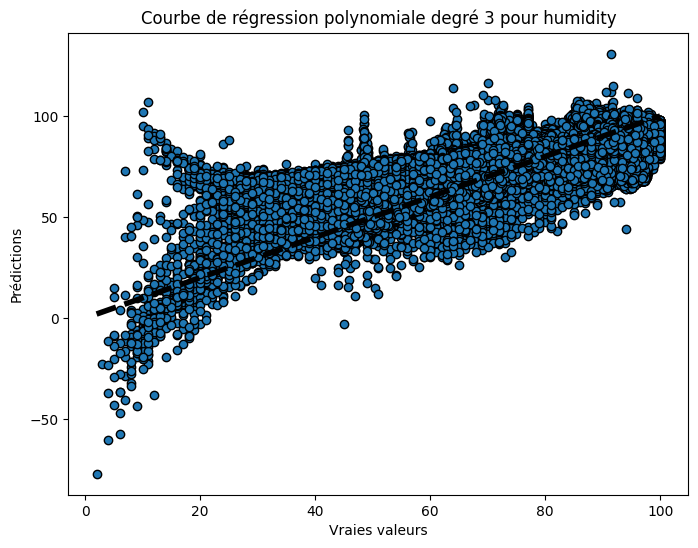

Scores de validation croisée pour humidity (MSE): [181.56443273 184.79919219 181.46299659 183.24139187 180.71816599]
Score moyen de validation croisée pour humidity (MSE): 182.35723587524177
Scores de validation croisée pour humidity (RMSE): [13.4745847  13.59408666 13.47082019 13.53666842 13.44314569]
Score moyen de validation croisée pour humidity (RMSE): 13.503861131047557

Scores de validation croisée pour humidity (MAE): [10.60866435 10.67999435 10.58479442 10.63429819 10.5785179 ]
Score moyen de validation croisée pour humidity (MAE): 10.617253841242459

Scores de validation croisée pour R2: [0.46067568 0.46430017 0.46494881 0.46120649 0.4661754 ]
Score moyen de validation croisée pour R2: 0.4634613097837751
 ------------------------------------------------------ 

Degré 4:


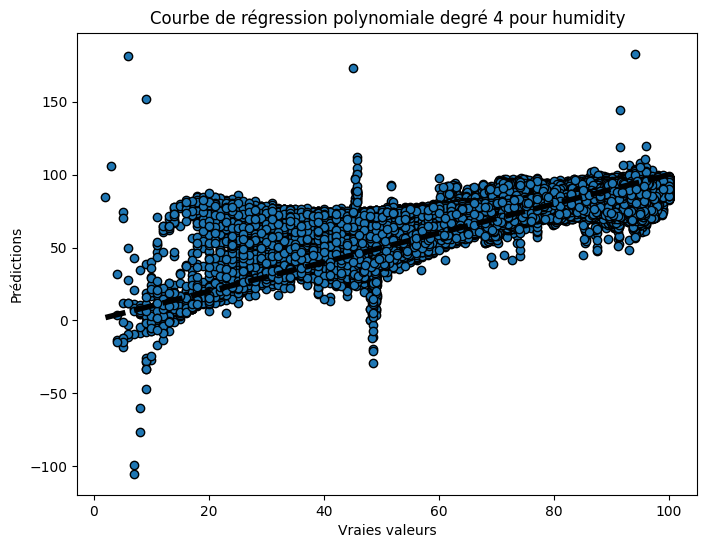

Scores de validation croisée pour humidity (MSE): [157.01117761 159.6576599  160.05751178 212.48672728 157.82131642]
Score moyen de validation croisée pour humidity (MSE): 169.40687859673136
Scores de validation croisée pour humidity (RMSE): [12.53041011 12.63557121 12.65138379 14.57692448 12.56269543]
Score moyen de validation croisée pour humidity (RMSE): 12.99139700474247

Scores de validation croisée pour humidity (MAE): [9.52650995 9.57281903 9.5017171  9.57586136 9.49682266]
Score moyen de validation croisée pour humidity (MAE): 9.53474602043427

Scores de validation croisée pour R2: [0.53360939 0.53718098 0.52806377 0.37521502 0.53381056]
Score moyen de validation croisée pour R2: 0.5015759432998985
 ------------------------------------------------------ 

Degré 5:


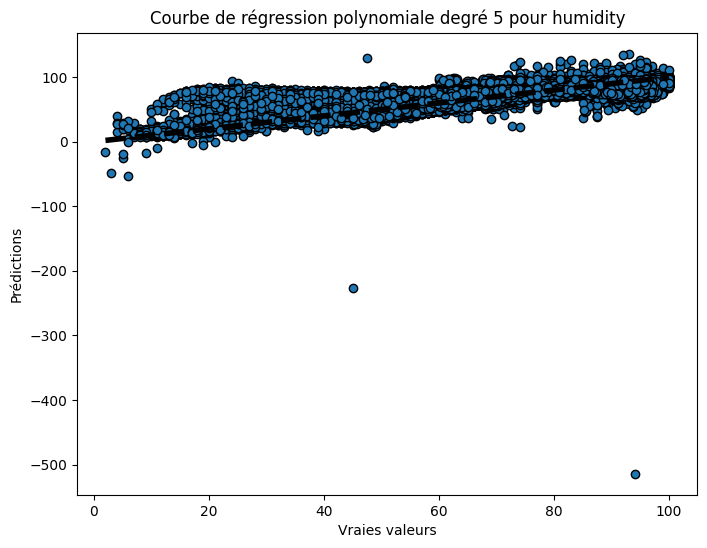

Scores de validation croisée pour humidity (MSE): [ 149.66495462  189.19500482  197.73468504 3003.29585606  220.30664515]
Score moyen de validation croisée pour humidity (MSE): 752.039429138242
Scores de validation croisée pour humidity (RMSE): [12.2337629  13.75481751 14.06181656 54.8023344  14.84273038]
Score moyen de validation croisée pour humidity (RMSE): 21.939092351343827

Scores de validation croisée pour humidity (MAE): [9.24657565 9.32846555 9.24941413 9.45967196 9.25495354]
Score moyen de validation croisée pour humidity (MAE): 9.307816163196074

Scores de validation croisée pour R2: [ 0.55543082  0.45155749  0.41697105 -7.8307357   0.34923473]
Score moyen de validation croisée pour R2: -1.2115083198268028
 ------------------------------------------------------ 


In [83]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

columns_poly = ['dewpoint', 'humidity']

degrees = [2, 3, 4, 5]  

for target_column in columns_poly:
    print(f"Régression polynomiale pour la colonne: {target_column}")

    features = df_cleaned.drop(columns=['date', target_column])
    target = df_cleaned[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    for degree in degrees:
        print(f"\nDegré {degree}:")

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear_regression', LinearRegression())
        ])

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
        plt.xlabel('Vraies valeurs')
        plt.ylabel('Prédictions')
        plt.title(f'Courbe de régression polynomiale degré {degree} pour {target_column}')
        plt.show()

        
        mse_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        mse_scores = -mse_scores  
        rmse_scores = np.sqrt(mse_scores)  
        print(f'Scores de validation croisée pour {target_column} (MSE): {mse_scores}')
        print(f'Score moyen de validation croisée pour {target_column} (MSE): {mse_scores.mean()}')

        print(f'Scores de validation croisée pour {target_column} (RMSE): {rmse_scores}')
        print(f'Score moyen de validation croisée pour {target_column} (RMSE): {rmse_scores.mean()}\n')

       
        mae_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        mae_scores = -mae_scores  
        print(f'Scores de validation croisée pour {target_column} (MAE): {mae_scores}')
        print(f'Score moyen de validation croisée pour {target_column} (MAE): {mae_scores.mean()}\n')


        r2_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
        print(f'Scores de validation croisée pour R2: {r2_scores}')
        print(f'Score moyen de validation croisée pour R2: {r2_scores.mean()}')
        print(' ------------------------------------------------------ ')


petite erreur sur reg polynomiale il faut que je modifie.